<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-16 06:44:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  65.3MB/s    in 3.1s    

2025-07-16 06:44:07 (65.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


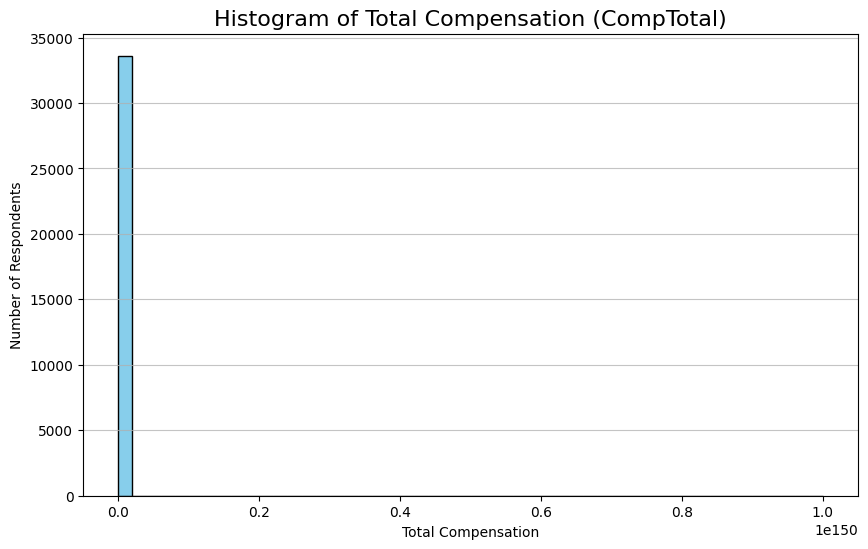

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Clean CompTotal column: convert to numeric and handle missing or invalid values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop missing or zero values (optional, depending on your data)
comp_data = df['CompTotal'].dropna()
comp_data = comp_data[comp_data > 0]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)', fontsize=16)
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


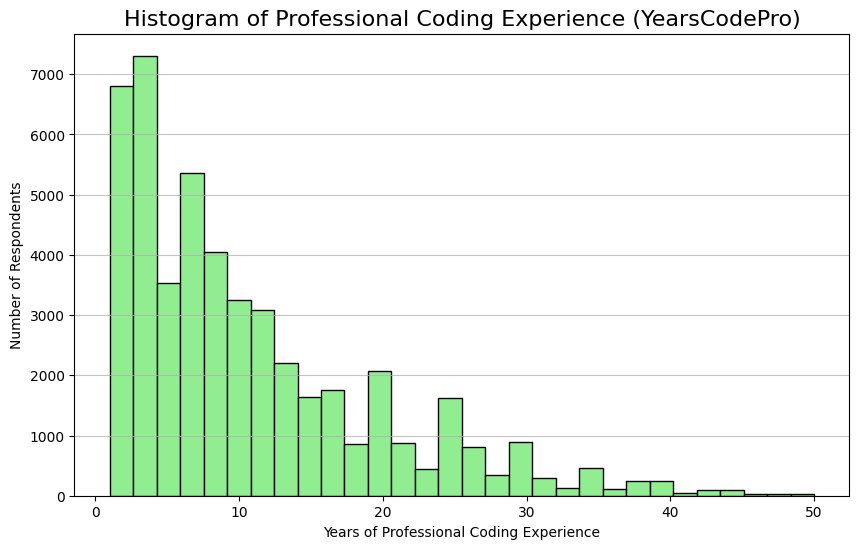

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Clean YearsCodePro column: convert to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop NaN values
years_code_pro = df['YearsCodePro'].dropna()

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(years_code_pro, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Professional Coding Experience (YearsCodePro)', fontsize=16)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


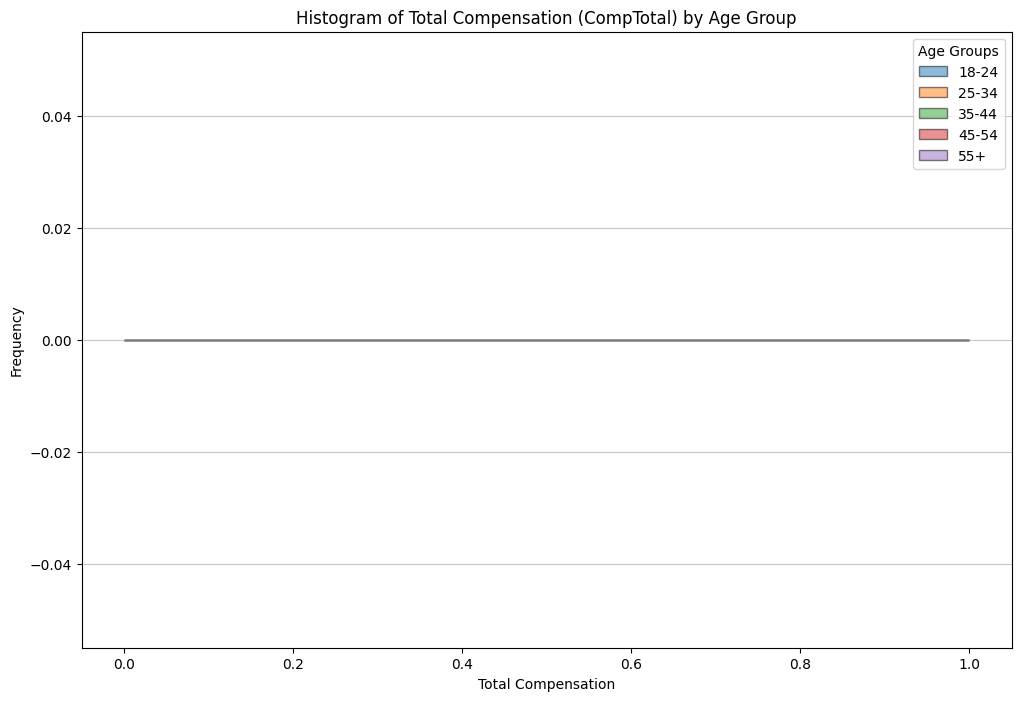

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('survey-data.csv')

# Convert CompTotal and Age to numeric (coerce errors to NaN)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing values in Age or CompTotal
df_clean = df.dropna(subset=['Age', 'CompTotal'])

# Define age bins and labels
bins = [18, 25, 35, 45, 55, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']

# Create AgeGroup column based on bins
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

# Plot histograms of CompTotal by AgeGroup
plt.figure(figsize=(12, 8))

for label in labels:
    subset = df_clean[df_clean['AgeGroup'] == label]['CompTotal']
    plt.hist(subset, bins=30, alpha=0.5, label=label, edgecolor='black')

plt.title('Histogram of Total Compensation (CompTotal) by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.legend(title='Age Groups')
plt.grid(axis='y', alpha=0.7)
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


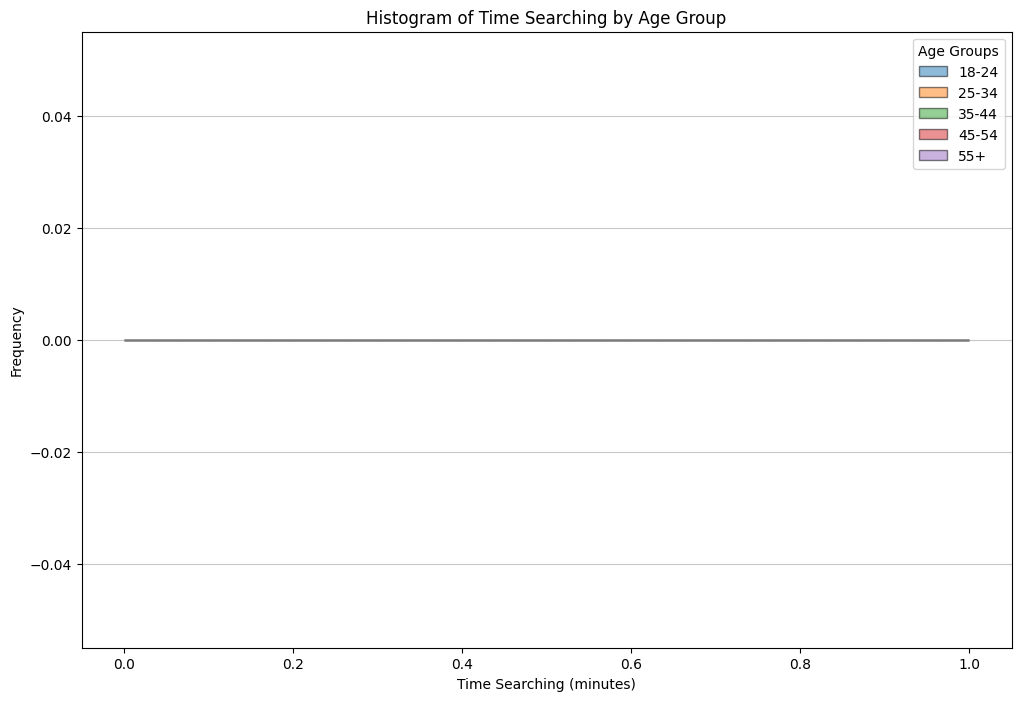

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('survey-data.csv')

# Convert necessary columns to numeric (coerce errors to NaN)
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing values in Age or TimeSearching
df_clean = df.dropna(subset=['Age', 'TimeSearching'])

# Define age bins and labels
bins = [18, 25, 35, 45, 55, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']

# Create AgeGroup column based on bins
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

# Plot histograms of TimeSearching by AgeGroup
plt.figure(figsize=(12, 8))

for label in labels:
    subset = df_clean[df_clean['AgeGroup'] == label]['TimeSearching']
    plt.hist(subset, bins=30, alpha=0.5, label=label, edgecolor='black')

plt.title('Histogram of Time Searching by Age Group')
plt.xlabel('Time Searching (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Age Groups')
plt.grid(axis='y', alpha=0.7)
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


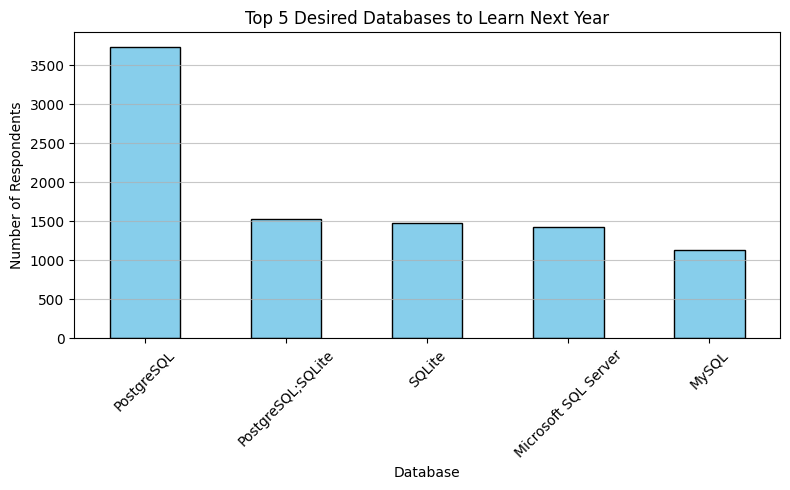

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Count the frequency of each desired database
db_counts = df['DatabaseWantToWorkWith'].value_counts().dropna()

# Select the top 5 databases
top5_dbs = db_counts.head(5)

# Plot histogram (bar chart) for the top 5 databases
plt.figure(figsize=(8,5))
top5_dbs.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Desired Databases to Learn Next Year')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


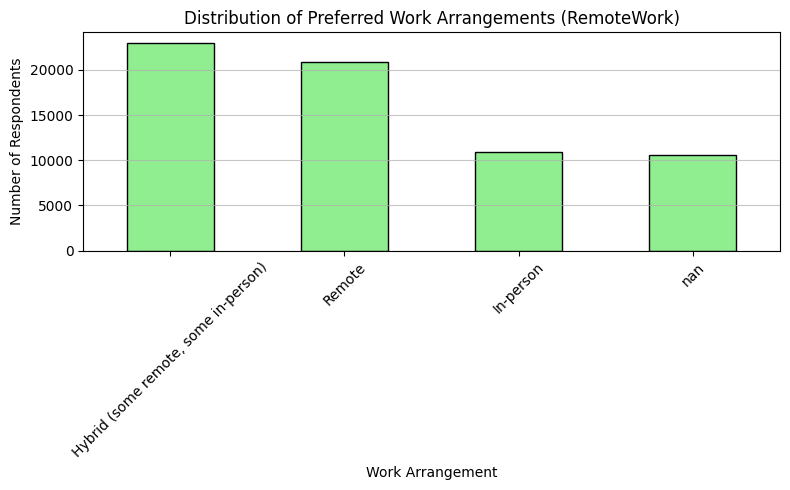

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Count frequency of each category in RemoteWork
remote_work_counts = df['RemoteWork'].value_counts(dropna=False)

# Plot the histogram (bar chart)
plt.figure(figsize=(8,5))
remote_work_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Distribution of Preferred Work Arrangements (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


/tmp/ipykernel_546/3203291271.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
/tmp/ipykernel_546/3203291271.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CompTotal'] = pd.to_numeric(df_clean['CompTotal'], errors='coerce')


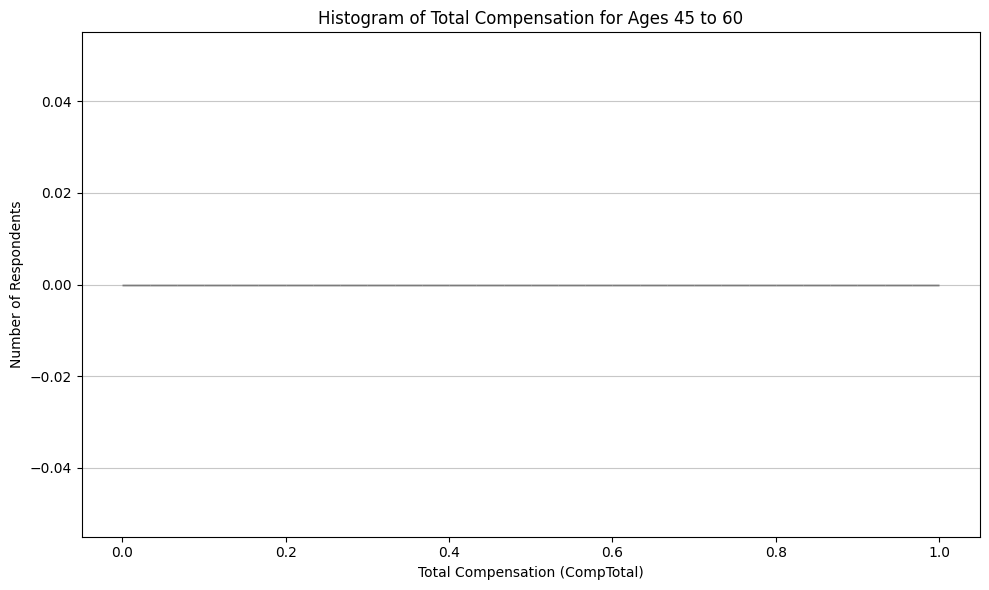

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Clean data: Remove rows with missing or invalid 'Age' or 'CompTotal'
df_clean = df.dropna(subset=['Age', 'CompTotal'])

# Convert 'Age' and 'CompTotal' columns to numeric (if needed)
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean['CompTotal'] = pd.to_numeric(df_clean['CompTotal'], errors='coerce')

# Filter for age group between 45 and 60
age_filtered = df_clean[(df_clean['Age'] >= 45) & (df_clean['Age'] <= 60)]

# Plot histogram of CompTotal for this age group
plt.figure(figsize=(10,6))
plt.hist(age_filtered['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation for Ages 45 to 60')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
## Write your code here

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
